
This notebooks contains code for trying out different augmentation functions and select the most appropriate for the task. 

Since the scan model relies  on augmentation 




## Final Augmentatios 

1. RandomCropResize : Scale first the ratio then resize 
2. CollorJitter : Brightness : [0.5,2] , contrast : [2,7] rest 0 
3. Horizontal Flip 

4. Vertical Flip 

5. Normalize with cusotm mean and std




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Omdena/Unsupervised\ Methods/Unsupervised-Classification/SCAN
!ls -lh

/content/drive/My Drive/Omdena/Unsupervised Methods/Unsupervised-Classification/SCAN
total 939K
-rw-------  1 root root 174K Dec  4 09:41  all_before_attack_images.jpg
drwx------  5 root root 4.0K Nov 25 14:10  cifar-10
drwx------  6 root root 4.0K Nov 25 14:10  configs
drwx------  4 root root 4.0K Dec 23 15:01  data
drwx------  5 root root 4.0K Nov 25 14:31  euroSAT
-rw-------  1 root root 5.9K Nov 25 06:07  eval.py
-rw-------  1 root root  13K Dec 23 08:24  kenya_224.csv
drwx------  2 root root 4.0K Dec  3 14:01  kenya_jpeg
drwx------  5 root root 4.0K Dec  7 13:02  KenyaModel_5CLS
drwx------  5 root root 4.0K Dec  7 09:06  KenyaModel6CLS
drwx------  5 root root 4.0K Dec  7 08:45  KenyaModel_6CLS
drwx------  3 root root 4.0K Dec 23 15:14  KenyaModel_6CLS_153
drwx------  5 root root 4.0K Dec  6 11:32  KenyaModel_8CLS
drwx------  2 root root 4.0K Dec 15 14:57  kenya_tiff
-rw-------  1 root root 159K Dec  8 04:51  kmeans.jpg
-rw-------  1 root root 1.2K Dec  6 16:13  kmeans_labels_6.npy

In [ ]:
from PIL import Image
from torch.utils.data import Dataset 
import os
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import cv2
import numpy as np

class KenyaDataset(Dataset):

    def __init__(self,img_path,transform):

      self.img_path = img_path 

      self.transform = transform
    
    def __len__(self):
        return len(os.listdir(self.img_path))

    def get_image(self, index):
        img_path = os.path.join(self.img_path,f'image_{index}.jpeg')  
        img = Image.open(img_path)
        img = img.convert('RGB')
        return img
 
    def __getitem__(self,index):

      img = self.get_image(index)

      if self.transform:
          img = self.transform(img)

      return {'image':img}

    #functions used for plotting images     
    def show_img(self,index,aug = False):
        img =  self.get_image(index)
 
        if aug:
          img = self.transform(img).permute(1,2,0)
        
        plt.imshow(img)
    
    # will create a batch x batch images 
    def plot_batch(self,batch = 8,indices = None,size = (20,20)):
 
        
        if not self.transform:
           raise ValueError("Transforms are none. ") 


        n_images = self.__len__()
 
        if indices == None:
           indices = np.random.choice(range(n_images) , size=  batch * (batch //2)) 
 
     
        images = [self.get_image(i) for i in indices]
        
        fig,axis = plt.subplots(batch,batch,figsize = size)
 
        aug = False
        idx = 0
        for  ax in axis.flatten():
 
            if  not aug:
              ax.imshow(images[idx])
              aug = True
            else:
              ax.imshow(self.transform(images[idx]).permute(1,2,0))
              idx += 1
              aug = False

                
 
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
             
    


# Plotting Batch of Augmented Images 

In [ ]:
from utils.common_config import get_train_transformations
from utils.config import create_config
from torchvision.transforms import Compose,ToTensor,RandomResizedCrop,RandomHorizontalFlip,ColorJitter,RandomGrayscale,RandomApply
from torch.utils.data import DataLoader
from tqdm import tqdm
import PIL

transform = Compose([
                      RandomResizedCrop(size=(153, 153), scale=(0.2, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR),
                      RandomHorizontalFlip(p=0.5),
                      RandomApply([ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[-0.1, 0.1])],p = 0.8),
                      # RandomGrayscale(p=0.2),
                      ToTensor()
                      # Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
                      ])
                        


print(transform)

Compose(
    RandomResizedCrop(size=(153, 153), scale=(0.2, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    RandomApply(
    p=0.8
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[-0.1, 0.1])
)
    ToTensor()
)


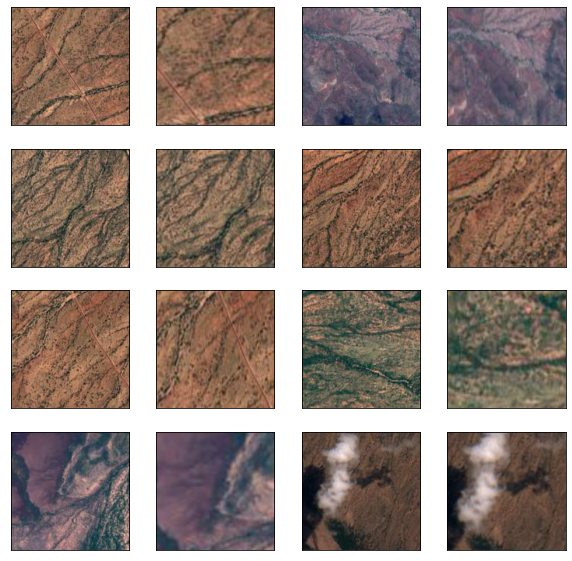

In [ ]:
# images without any augmentation
dataset = KenyaDataset('kenya_jpeg',transform)
dataset.plot_batch(batch = 4,indices = list(range(8)),size = (10,10))

#Augmentation : RandomResizedCrop

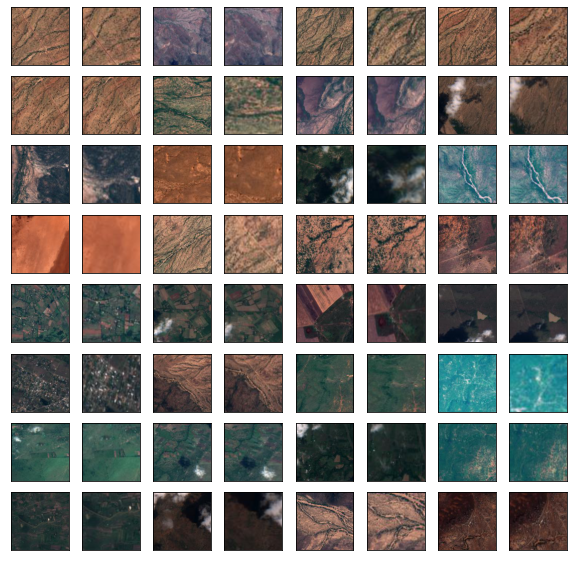

In [ ]:
transform = Compose([
                      RandomResizedCrop(size=(153, 153), 
                                        scale=(0.1, 1.0), 
                                        ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR),
                      ToTensor()
                      ])

dataset = KenyaDataset('kenya_jpeg',transform)
dataset.plot_batch(batch = 8,indices = list(range(8 * 4)),size = (10,10))

# Augmentation :  ColorJitter

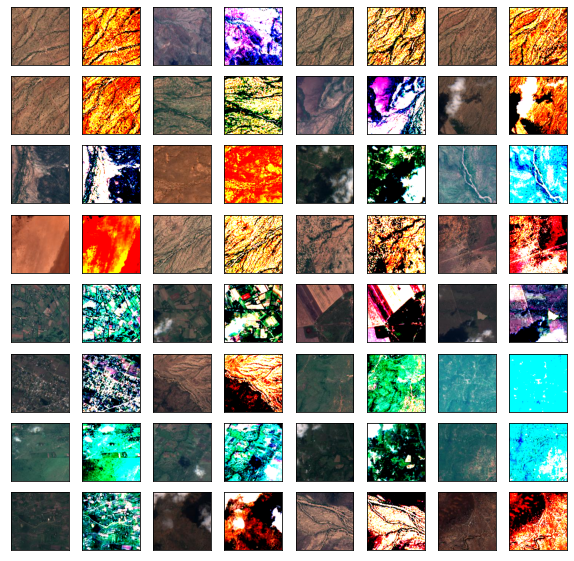

In [ ]:
#max values 
transform = Compose([
                      RandomApply([ColorJitter(brightness=[2,2], contrast=[7,7], saturation=0, hue = 0)],p = 1.0),
                      ToTensor()
                      ])

dataset = KenyaDataset('kenya_jpeg',transform)
dataset.plot_batch(batch = 8,indices = list(range(8 * 4)),size = (10,10))

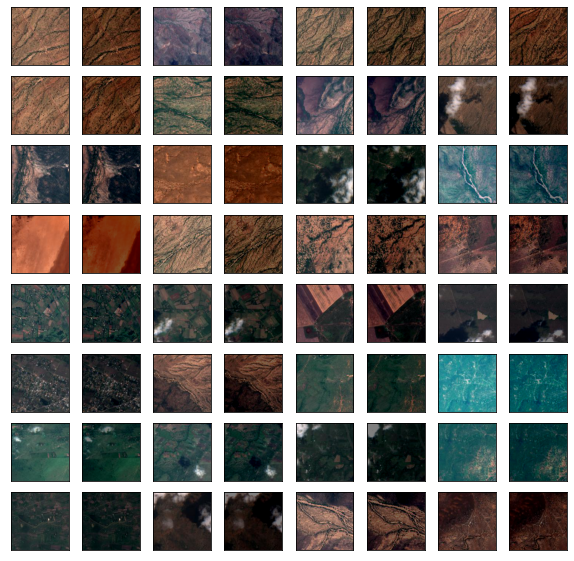

In [ ]:
#min values 
transform = Compose([
                      RandomApply([ColorJitter(brightness=[0.5,0.5], contrast=[2,2], saturation=0, hue = 0)],p = 1.0),
                      ToTensor()
                      ])

dataset = KenyaDataset('kenya_jpeg',transform)
dataset.plot_batch(batch = 8,indices = list(range(8 * 4)),size = (10,10))

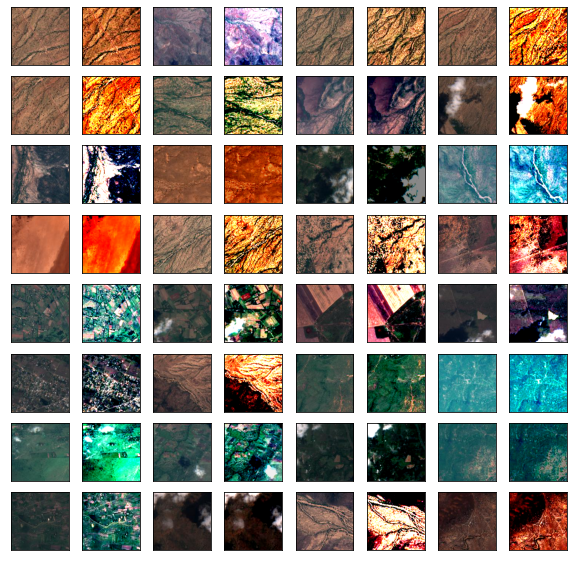

In [ ]:
#max values 
transform = Compose([
                      RandomApply([ColorJitter(brightness=[0.5,2], contrast=[2,7], saturation=0, hue = 0)],p = 1.0),
                      ToTensor()
                      ])

dataset = KenyaDataset('kenya_jpeg',transform)
dataset.plot_batch(batch = 8,indices = list(range(8 * 4)),size = (10,10))

## Final Augmentatios 

1. RandomCropResize : Scale first the ratio then resize 
2. CollorJitter : Brightness : [0.5,2] , contrast : [2,7] rest 0 
3. Horizontal Flip 

4. Vertical Flip 

5. Normalize with cusotm mean and std


# Visualize the neighbours 

In [ ]:
%cd drive/My Drive/Omdena/Unsupervised\ Methods/Unsupervised-Classification/SCAN

/content/drive/My Drive/Omdena/Unsupervised Methods/Unsupervised-Classification/SCAN


In [ ]:
from utils.common_config import get_train_transformations
from utils.config import create_config
p = create_config('configs/env.yml','configs/pretext/simclr_kenya_custom_augmentation.yml')
transforms = get_train_transformations(p)
print(transforms)
# p['augmentation_kwargs']

Compose(
    RandomResizedCrop(size=(153, 153), scale=(0.2, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomApply(
    p=0.8
    ColorJitter(brightness=[0.5, 2], contrast=[2, 7], saturation=None, hue=None)
)
    ToTensor()
    Normalize(mean=[0.4049, 0.309, 0.2831], std=[0.2702, 0.1792, 0.1679])
)
